# Advance Project -3

## Importing Python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
print ("Loading of required libraries is sucessful")

Loading of required libraries is sucessful


In [2]:
start = time.time()

## Importing the 50-Startups dataset

In [3]:
startups = pd.read_csv("50_Startups.csv")
print ("Dataset loading is sucessful")

Dataset loading is sucessful


## Preliminary data exploration

In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startups.shape

(50, 5)

In [8]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Data preprocessing

#### Checking Null values in the dataset

In [9]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Checking duplicate values in the dataset

In [10]:
startups.duplicated().sum()

0

## Exploratory data analysis

#### Box plot for numerical variables to show the spread

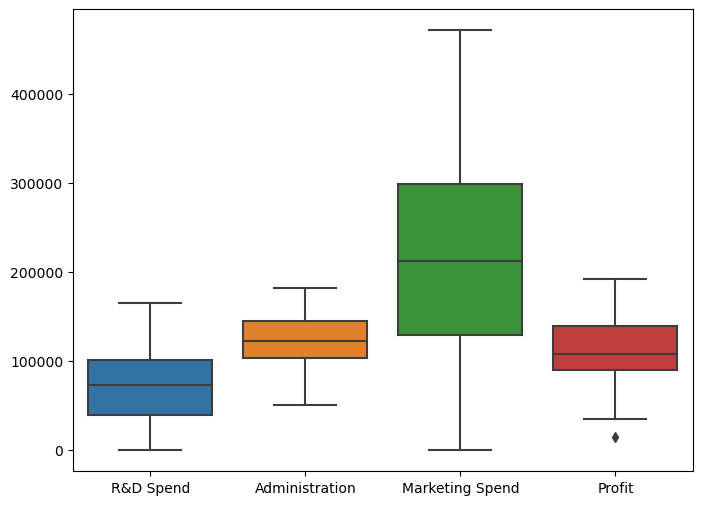

In [11]:
num_col = startups.select_dtypes (include = 'number')
plt.figure(figsize = (8,6))
sns.boxplot(data =num_col)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Box plot.png")
plt.show()

#### Profit across states

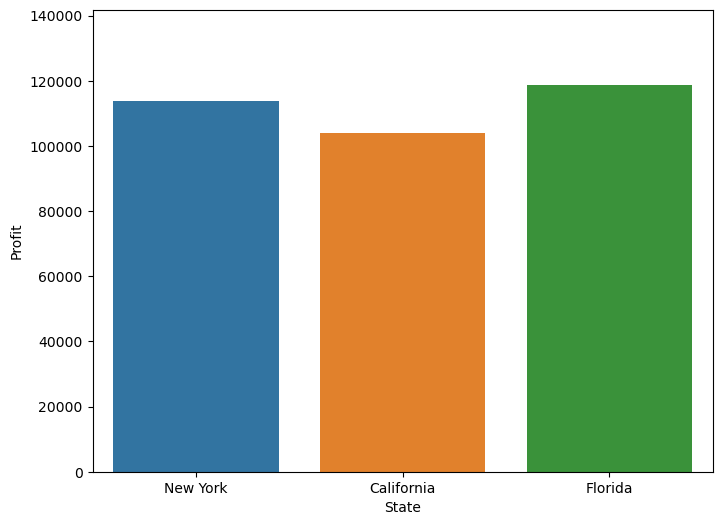

In [12]:
plt.figure(figsize = (8,6))
sns.barplot(data = startups, x = 'State', y = 'Profit', errwidth = 0)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Profit across states.png")
plt.show()

#### Relationships between R&D spend on profit across states

<Figure size 800x600 with 0 Axes>

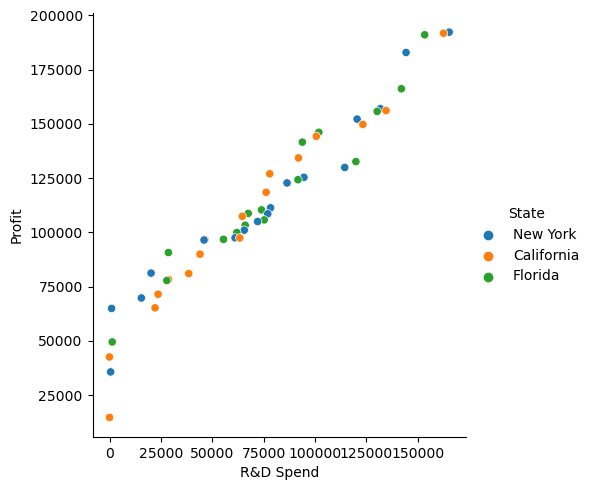

In [13]:
plt.figure(figsize = (8,6))
sns.relplot(data = startups, x = 'R&D Spend', y = 'Profit',hue = 'State', kind = 'scatter', legend='auto')
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/R&D vs Profit.png")
plt.show()

#### Relationship between marketing spend and Profit

<Figure size 1000x800 with 0 Axes>

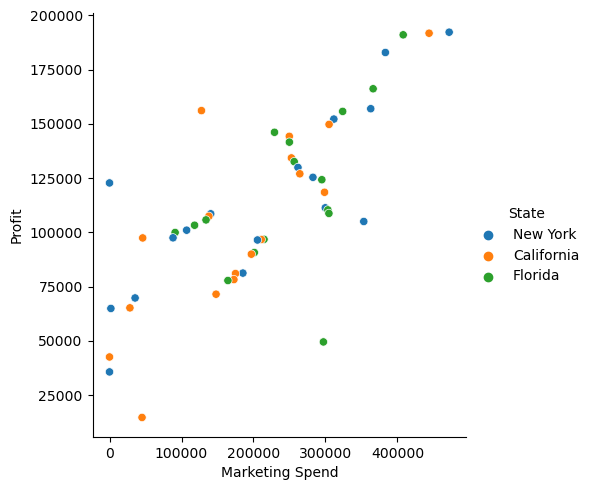

In [14]:
plt.figure(figsize = (10,8))
sns.relplot(data = startups, x = 'Marketing Spend', y = 'Profit', hue = 'State', kind = 'scatter')
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Marketing Spend vs Profit.png")
plt.show()

#### Correlation heatmap

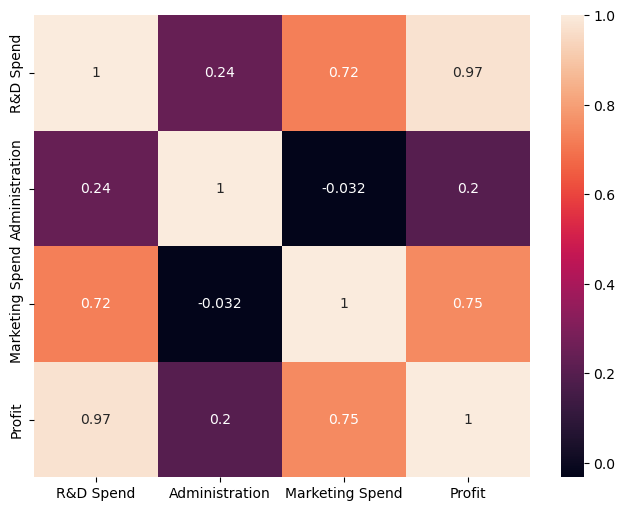

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(data = startups [['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr(), annot = True)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Heatmap.png")
plt.show()

### Data Splitting

In [16]:
y = startups['Profit'].values

In [17]:
X = startups[['R&D Spend', 'Administration', 'Marketing Spend']].values

In [18]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [19]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

### Model 1: 70-30% split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [21]:
X_train.shape

(35, 3)

In [22]:
X_test.shape

(15, 3)

In [23]:
model1 = LinearRegression()

In [24]:
model1.fit(X_train, y_train)

LinearRegression()

In [25]:
coefficients = model1.coef_
coefficients

array([ 0.80099575, -0.03154245,  0.02806992])

In [26]:
intercept = model1.intercept_
intercept

51026.806430969125

In [27]:
model1_pred = model1.predict(X_test)

In [28]:
r2_score_model1 = r2_score(y_test, model1_pred)
print ("The R-square value of the Model is: ", r2_score_model1)

The R-square value of the Model is:  0.9163636820202413


In [29]:
mean_squared_error_model1 = mean_squared_error(y_test, model1_pred)
print ("The MSE of the model is: ", mean_squared_error_model1)
print ("The RMSE of the model is : ", np.sqrt(mean_squared_error_model1))

The MSE of the model is:  129698297.22689486
The RMSE of the model is :  11388.516023911758


### Model 2: 80-20% split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [31]:
model2 = LinearRegression()

In [32]:
model2.fit(X_train, y_train)

LinearRegression()

In [33]:
Coefficients = model2.coef_
Coefficients

array([ 0.8200639 , -0.04952205,  0.02136621])

In [34]:
intercept = model2.intercept_
intercept

53107.930437149094

In [35]:
model2_pred = model2.predict(X_test)

In [36]:
r2_score_model2 = r2_score(y_test, model2_pred)
print("R-square value of the Model is: ", r2_score_model2)

R-square value of the Model is:  0.915776333442439


In [37]:
mean_squared_error_model2 = mean_squared_error(y_test, model2_pred)
print ("The MSE of the model is: ", mean_squared_error_model2)
print ("The RMSE of the model is : ", np.sqrt(mean_squared_error_model2))

The MSE of the model is:  178704643.17345557
The RMSE of the model is :  13368.045600365656


### Model comparision

    Model  R2 Score
0  model1  0.916364
1  model2  0.915776


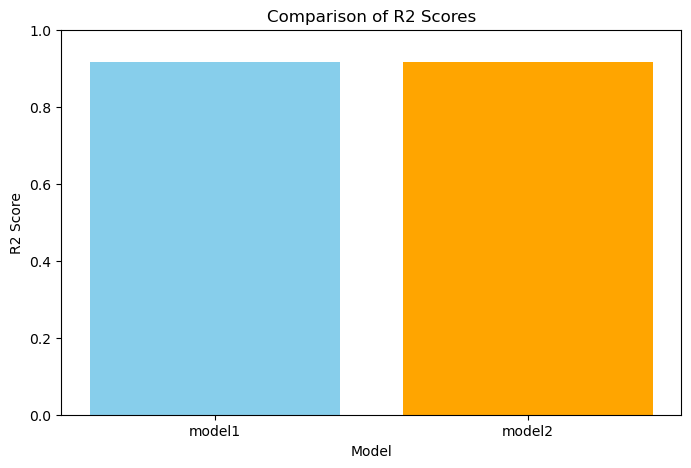

In [38]:
# Create a DataFrame for the R² scores
r2_scores = pd.DataFrame({'Model': ['model1', 'model2'], 'R2 Score': [r2_score_model1, r2_score_model2]})

# Print the table
print(r2_scores)

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(r2_scores['Model'], r2_scores['R2 Score'], color=['skyblue', 'orange'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')
plt.ylim(0, 1)
plt.show()

In [39]:
end = time.time()

In [40]:
print(f"The time elapsed for execeution of the program is:  {(end-start)} seconds")

The time elapsed for execeution of the program is:  1.9213488101959229 seconds
